# Cavity Circuit Representations

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

## Eigenvector / eigenvalue calculations

In [19]:
def three_stage_modes(L, C, LJ, CJ, debug=False):
    """
    Compute the eigenvalues and eigenvectors for the three stage
    circuit describing the two lowest modes of the cavity + JJ
    """
    # Inductance matrix
    Lmat = np.diag([1./L[0] + 1./L[1], 1./LJ + 1./L[2], 1./L[2]+1./L[3]])
    Loff = np.diag([-1./L[1], -1./L[2]], k=1)
    Lmat += Loff + Loff.T
    
    # Capacitance matrix
    Cmat = np.diag([C[0], CJ, C[1]])
    
    # Solve the generalized eigenvalue problem
    # A * x = l * B * x
    # L^-1 * x - w^2 * C * x
    evals, evecs = scipy.linalg.eig(Lmat, b=Cmat)
    
    # Print the L^-1 and C matrices
    if debug:
        print(f'L^-1:\n{Lmat}')
        print(f'C:\n{Cmat}')
    
    return evals.real, evecs

In [20]:
three_stage_modes([1]*4, [1]*2, 0.8, 1, debug=True)

L^-1:
[[ 2.   -1.    0.  ]
 [-1.    2.25 -1.  ]
 [ 0.   -1.    2.  ]]
C:
[[1 0 0]
 [0 1 0]
 [0 0 1]]


(array([3.54472709, 2.        , 0.70527291]),
 array([[ 4.77481651e-01, -7.07106781e-01, -5.21546999e-01],
        [-7.37578840e-01, -1.72162056e-16, -6.75261027e-01],
        [ 4.77481651e-01,  7.07106781e-01, -5.21546999e-01]]))

## Plotting macros

In [21]:
def set_axes_fonts(ax, fsize):
    """
    Set axes font sizes because it should be abstracted away
    """
    for tick in ax.get_xticklabels():
        tick.set_fontsize(fsize)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(fsize)

In [22]:
def set_xaxis_rot(ax, angle=45):
    """
    Rotate the x-axis labels
    """
        
    for tick in ax.get_xticklabels():
        tick.set_rotation(angle)

In [23]:
def set_leg_outside(ax, fsize):
    """
    Sets the legend location outside
    """
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    # Put a legend to the right of the current axis
    hdls, legs = ax.get_legend_handles_labels()
    leg = ax.legend(hdls, legs, loc='center left', bbox_to_anchor=(1, 0.5), \
                    fontsize=fsize, framealpha=0.)

    return leg

## Inspect the eigenvalues and eigenvectors vs. $L_J$

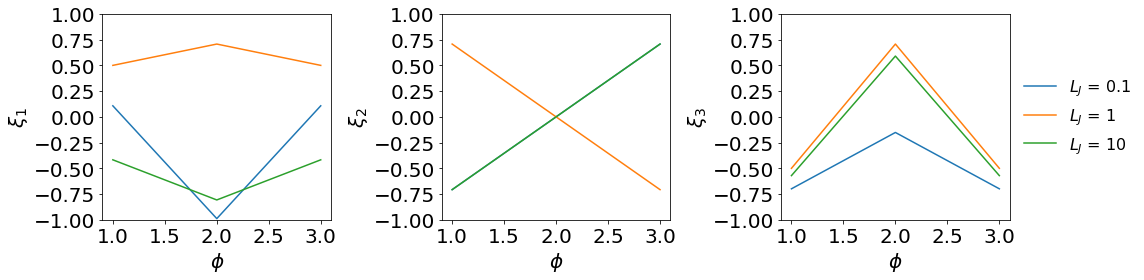

In [24]:
# Logarithmically spaced LJ values
LJs = np.array([0.1, 1, 10]) # np.logspace(np.log10(0.1e-9), np.log10(100e-9), 3)

# Set all stage inductors and capacitors to be equal
L = [1.] * 4
C = [1.] * 2
CJ = 1.

# Start the figure
fig, ax = plt.subplots(1, 3, figsize=(16, 4), tight_layout=True)
fsize = 20; lsize = 16
dstr = datetime.datetime.today().strftime('%y%m%d')

# Compute the eigenvalues and eigenvectors on-the-fly
for idx, LJ in enumerate(LJs):
    evals, evecs = three_stage_modes(L, C, LJ, CJ)
    for cidx in range(3):
        ax[cidx].plot([1, 2, 3],
                     evecs[:, cidx], label=r'$L_J$ = %.2g' % LJ)

        ax[cidx].set_xlabel('$\phi$', fontsize=fsize)
        ax[cidx].set_ylabel(r'$\xi_{%d}$' % (cidx + 1), fontsize=fsize)
        set_axes_fonts(ax[cidx], fsize)
        ax[cidx].set_ylim([-1, 1])
        
set_leg_outside(ax[2], lsize)
fig.savefig(f'../figs/evecs_three_stage_{dstr}.pdf',
           format='pdf')

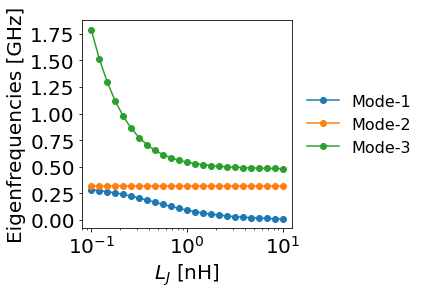

In [37]:
# Compute the eigenvalues
LJsfull = np.logspace(np.log10(0.1), np.log10(10), 25)
evs = np.zeros([3, len(LJsfull)])
for Lidx, LJ in enumerate(LJsfull):
    evv, _ = three_stage_modes(L, C, LJ, CJ)
    evs[:, Lidx] = np.sort(evv)
    
# Plot the eigenvalues
fig_ev, ax_ev = plt.subplots(1, 1, tight_layout=True)
for widx, w in enumerate(evs):
    ax_ev.plot(LJsfull, w/2/np.pi, 'o-', label=f'Mode-{widx+1}')
ax_ev.set_xlabel(r'$L_J$ [nH]', fontsize=fsize)
ax_ev.set_ylabel(r'Eigenfrequencies [GHz]', fontsize=fsize)
ax_ev.set_xscale('log')
set_axes_fonts(ax_ev, fsize)
set_leg_outside(ax_ev, lsize)
fig_ev.savefig(f'../figs/evals_three_stage_{dstr}.pdf',
              format='pdf')